In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

* Desafios Aula 3:
    
    
* Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (matplotlib linha vertical)
* Desafio 2: Criar matriz de correlação triangular/diagonal
* Desafio 3: Filtrar as notas do seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral
* Desafio 4: Pensar sobre a correlação entre matemática e Linguagens

## Desafio 1: Plotar as médias, medianas e moda nas notas de LC e MT (matplotlib linha vertical)

In [4]:
dados = dados.query('NU_NOTA_LC != 0')
dados = dados.query('NU_NOTA_MT != 0')

In [5]:
dados[['NU_NOTA_LC','NU_NOTA_MT']].mean()

NU_NOTA_LC    520.980225
NU_NOTA_MT    523.714871
dtype: float64

In [6]:
dados[['NU_NOTA_LC','NU_NOTA_MT']].median()

NU_NOTA_LC    526.2
NU_NOTA_MT    501.7
dtype: float64

In [7]:
dados[['NU_NOTA_LC','NU_NOTA_MT']].mode()

,NU_NOTA_LC,NU_NOTA_MT
0,528.5,427.1


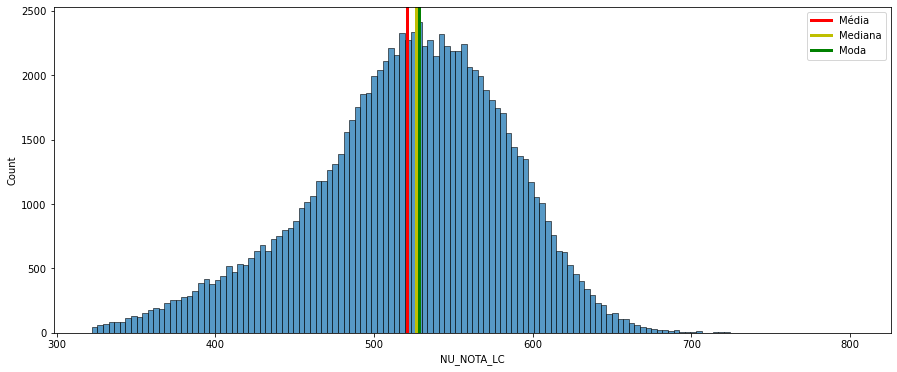

In [8]:
plt.figure(figsize=(15,6))
plt.axvline(dados['NU_NOTA_LC'].mean(),linewidth=3, color='r', label='Média')
plt.axvline(dados['NU_NOTA_LC'].median(),linewidth=3, color='y', label='Mediana')
plt.axvline(float(dados['NU_NOTA_LC'].mode()),linewidth=3, color='g',label='Moda')
sns.histplot(data=dados, x='NU_NOTA_LC')
plt.legend();

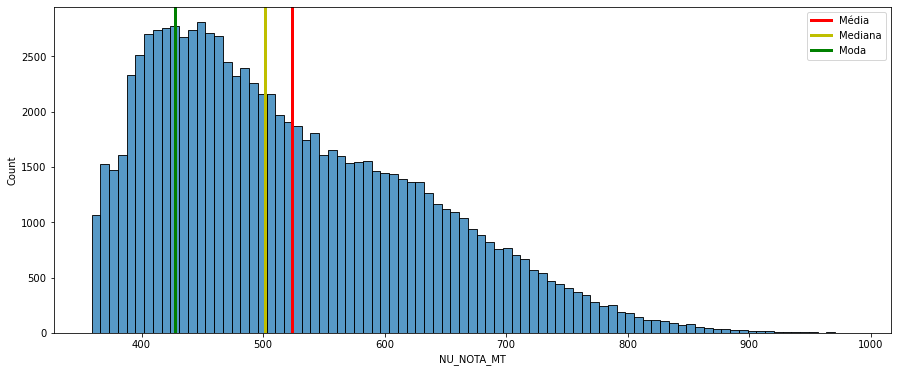

In [9]:
plt.figure(figsize=(15,6))
plt.axvline(dados['NU_NOTA_MT'].mean(),linewidth=3, color='r', label='Média')
plt.axvline(dados['NU_NOTA_MT'].median(),linewidth=3, color='y', label='Mediana')
plt.axvline(float(dados['NU_NOTA_MT'].mode()),linewidth=3, color='g', label='Moda')
sns.histplot(data=dados, x='NU_NOTA_MT')
plt.legend();

## Desafio 2: Criar matriz de correlação triangular/diagonal

In [10]:
provas = ['NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH']
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
dados[provas].head()

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH
0,420.0,488.6,435.6,432.4,512.3
1,400.0,375.3,NaN,NaN,409.3
2,560.0,441.0,423.2,427.2,499.1
3,500.0,551.5,426.2,499.9,578.1
4,780.0,511.2,516.5,424.5,571.3


In [11]:
provas = ['NU_NOTA_REDACAO', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH']
provas.append("NU_NOTA_TOTAL")

In [12]:
dados[provas].head()

,NU_NOTA_REDACAO,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_CH,NU_NOTA_TOTAL
0,420.0,488.6,435.6,432.4,512.3,2288.9
1,400.0,375.3,NaN,NaN,409.3,1184.6
2,560.0,441.0,423.2,427.2,499.1,2350.5
3,500.0,551.5,426.2,499.9,578.1,2555.7
4,780.0,511.2,516.5,424.5,571.3,2803.5


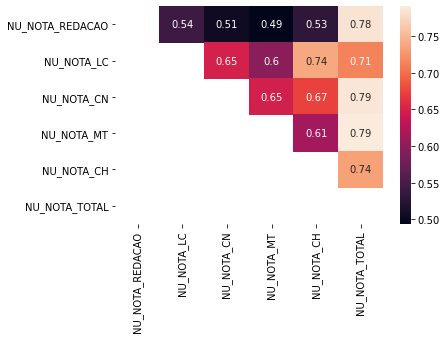

In [13]:
correlacao = dados[provas].corr()
matrix = np.tril(dados[provas].corr())
sns.heatmap(correlacao, annot=True, mask=matrix);

## Desafio 3: Filtrar as notas do seu estado ou sua cidade e refazer as análises, verificando se são semelhantes ao geral

* Comparando a nota total de São José dos Campos - SP com o resto do Brasil

* Média:
    * Brasil - 2543.4
    * São José dos Campos - 2768.5
    
* Mediana:
    * Brasil - 2545.7
    * São José dos Campos - 2744.7

* Moda:
    * Brasil - 2385.4
    * São José dos Campos - 3019.0

In [14]:
sjc = dados.query("NO_MUNICIPIO_RESIDENCIA == 'São José dos Campos'").query('NU_NOTA_TOTAL != 0')
sjc

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
14326,190001575141,2019,3549904,São José dos Campos,35,SP,17,F,1,0,...,A,B,B,A,B,E,A,A,B,877.6
14418,190001579379,2019,3549904,São José dos Campos,35,SP,18,F,1,1,...,A,B,C,B,A,E,B,B,B,2637.1
14419,190001579453,2019,3549904,São José dos Campos,35,SP,18,F,1,3,...,A,A,A,A,A,C,A,B,A,2577.0
14951,190001599249,2019,3549904,São José dos Campos,35,SP,17,M,1,1,...,A,A,B,B,A,B,B,B,B,2949.8
14962,190001599734,2019,3549904,São José dos Campos,35,SP,18,F,1,1,...,A,A,B,A,B,D,A,B,B,2341.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124924,190006002535,2019,3549904,São José dos Campos,35,SP,31,M,1,1,...,A,A,C,A,A,E,A,E,B,3610.6
125012,190006006123,2019,3549904,São José dos Campos,35,SP,16,M,1,3,...,A,B,C,B,A,D,A,A,B,2707.9
125043,190006007470,2019,3549904,São José dos Campos,35,SP,21,M,1,0,...,A,A,C,B,B,D,B,C,B,2391.9
125070,190006008553,2019,3549904,São José dos Campos,35,SP,16,F,1,1,...,A,A,B,A,A,C,A,B,A,2848.8


In [15]:
dados = dados.query('NU_NOTA_TOTAL != 0')

In [16]:
print(sjc[['NU_NOTA_TOTAL']].mean())
print(dados[['NU_NOTA_TOTAL']].mean())

NU_NOTA_TOTAL    2768.586149
dtype: float64
NU_NOTA_TOTAL    2543.447108
dtype: float64


In [17]:
print(sjc[['NU_NOTA_TOTAL']].median())
print(dados[['NU_NOTA_TOTAL']].median())

NU_NOTA_TOTAL    2744.7
dtype: float64
NU_NOTA_TOTAL    2545.7
dtype: float64


In [37]:
print(sjc[['NU_NOTA_TOTAL']].mode())
print(dados['NU_NOTA_TOTAL'].mode()[0])

   NU_NOTA_TOTAL
0         3019.0
2385.4


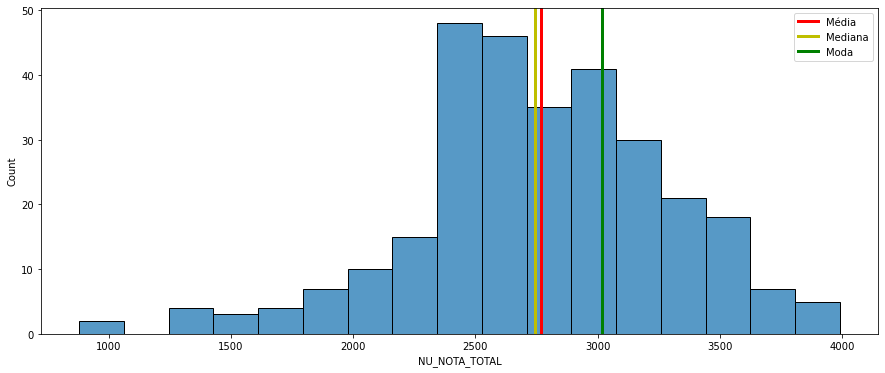

In [19]:
plt.figure(figsize=(15,6))
plt.axvline(sjc['NU_NOTA_TOTAL'].mean(),linewidth=3, color='r', label='Média')
plt.axvline(sjc['NU_NOTA_TOTAL'].median(),linewidth=3, color='y', label='Mediana')
plt.axvline(float(sjc['NU_NOTA_TOTAL'].mode()),linewidth=3, color='g', label='Moda')
sns.histplot(data=sjc, x='NU_NOTA_TOTAL')
plt.legend();

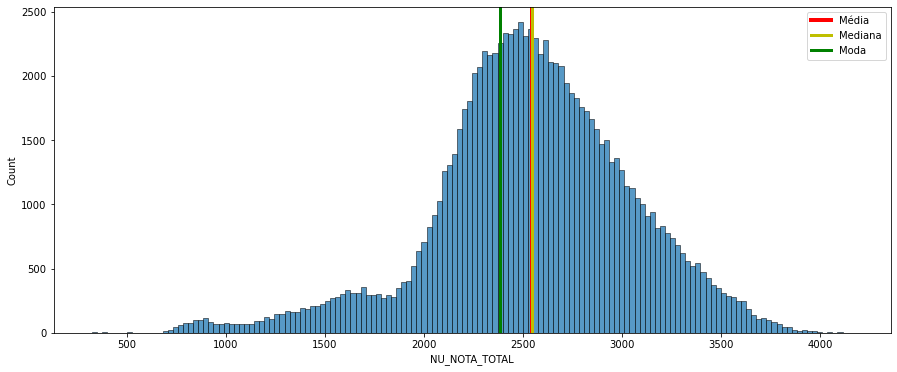

In [40]:
plt.figure(figsize=(15,6))
plt.axvline(dados['NU_NOTA_TOTAL'].mean(),linewidth=4, color='r', label='Média')
plt.axvline(dados['NU_NOTA_TOTAL'].median(),linewidth=3, color='y', label='Mediana')
plt.axvline(float(dados['NU_NOTA_TOTAL'].mode()[0]),linewidth=3, color='g', label='Moda')
sns.histplot(data=dados, x='NU_NOTA_TOTAL')
plt.legend();

## Desafio 4: Pensar sobre a correlação entre Matemática e Linguagens

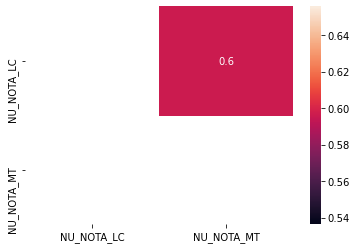

In [42]:
corr_mt_lg = ['NU_NOTA_LC', 'NU_NOTA_MT']
corr = dados[corr_mt_lg].corr()
matrix = np.tril(dados[corr_mt_lg].corr())
sns.heatmap(corr, annot=True, mask=matrix);